In [36]:
import pandas as pd
import numpy as np
import matplotlib as pl
from matplotlib import pyplot
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X,cv_X,train_y, cv_y = train_test_split(train_X, train_y, test_size = .1666666, random_state=42)

In [4]:
print('train x' + str(train_X.shape))
print('train y' + str(train_y.shape))

print('cv x' + str(cv_X.shape))
print('cv y' + str(cv_y.shape))

print('test x' + str(test_X.shape))
print('test y' + str(test_y.shape))


train x(50000, 28, 28)
train y(50000,)
cv x(10000, 28, 28)
cv y(10000,)
test x(10000, 28, 28)
test y(10000,)


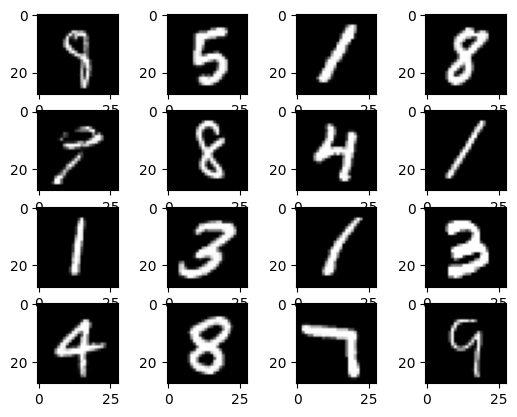

In [5]:
for i in range(16):  
    pyplot.subplot(4,4, 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [6]:
#Neural Network Math Framework

'''
Neural network model arch

input layer -> 784(28 x 28), acitvation = relu
hidden layer 1 -> 16, activation = relu
hidden layer 2 -> 16, activation = relu
output layer -> 10, activation = linear, apply softmax for probabilities

'''
'''
Back prop

Forward prop --> single layer done!

Grad descent

activation function --> done!

softmax function --> done!

cost function -->

'''
# 28 x 28

def initalize_params(layer_1_units, layer_2_units, output_layer, input_size):
    parameters = {
        "w1": np.random.randn(layer_1_units, input_size) * np.sqrt(2 / input_size),
        "b1": np.zeros((layer_1_units, 1)),
        "w2": np.random.randn(layer_2_units, layer_1_units) * np.sqrt(2 / input_size),
        "b2": np.zeros((layer_2_units, 1)),
        "w3": np.random.randn(output_layer, layer_2_units) * np.sqrt(2 / input_size),
        "b3": np.zeros((output_layer, 1))
    }
    return parameters

#activation function -> relu
def relu_activation(x):
    return np.maximum(0, x)

def relu_deriv(x):
    output = np.where(x > 0, 1, 0)
    return output

#softmax function for turning output activation -> probabilities 0-9
#extra note: subtracted max value to avoid decimal over/under flows(math will show its the same values at the end)
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    sum = np.sum(exp_x)
    array_return = exp_x / sum
    return array_return

def forward_prop_layer(X, W, b, func):
    output = np.dot(W, X) + b
    output = func(output)
    return output

def one_hot(yhat):
    output = np.zeros((10,1))
    output[yhat] = 1
    return output


def loss_(yhat, y):
    epsilon = 1e-12
    yhat = np.clip(yhat, epsilon, 1. - epsilon)
    return  -np.sum(y * np.log(yhat)) / y.shape[0]

def back_prop(W, y_hat, a2, a1, y, X, der):
    #hidden layer2 --> output(this)
    
    delta3 = y_hat - y
    dw3 = np.dot(delta3, a2.transpose())
    db3 = delta3
    der['dw3'] += dw3
    der['db3'] += db3

    #hidden layer1 --> hidden layer2(this)
    delta2_hold = np.dot(W['w3'].transpose(), delta3)
    z2 = np.dot(W['w2'],a1) + W['b2']
    z_deriv2 = relu_deriv(z2)

    delta2 = delta2_hold * z_deriv2
    dw2 = np.dot(delta2, a1.transpose())
    db2 = delta2
    der['dw2'] += dw2
    der['db2'] += db2

    #input --> hidden layer1(this)
    delta1_hold = np.dot(W['w2'].transpose(), delta2)
    z1 = np.dot(W['w1'],X) + W['b1']
    z_deriv1 = relu_deriv(z1)
    delta1 = delta1_hold * z_deriv1 
    dw1 = np.dot(delta1, X.transpose())
    db1 = delta1
    der['dw1'] += dw1
    der['db1'] += db1

    return der

In [7]:
def save_model(params, filename='model_params'):
    np.savez(filename, **params)


def load_model(filename = 'model_params.npz'):
    data = np.load(filename)
    return {key: data[key] for key in data}

In [8]:


def nn(train_X, train_y, rate, iterations):
    input_size = 784 

    layer_1_units = 16
    layer_2_units = 16
    output_layer = 10

    der = {
        'dw1' : np.zeros((16,784)),
        'db1' : np.zeros((16,1)),
        'dw2' : np.zeros((16,16)),
        'db2' : np.zeros((16,1)),
        'dw3' : np.zeros((10,16)),
        'db3' : np.zeros((10,1))
    }
    
    params = initalize_params(layer_1_units, layer_2_units,output_layer, input_size)

    #Layers --> Forward Prop
    for a in range(iterations):
        total_cost = 0
        for i in range(train_X.shape[0]):
            X = np.reshape(train_X[i].flatten(),(784,1)) 

            a1 = forward_prop_layer(X, params['w1'], params['b1'], relu_activation)
            a2 = forward_prop_layer(a1, params['w2'], params['b2'], relu_activation)
            y_hat = forward_prop_layer(a2, params['w3'], params['b3'], softmax)
            
            y_code = one_hot(train_y[i])

            loss = loss_(y_hat, y_code)

            total_cost += loss

            back_prop(params, y_hat, a2, a1, y_code, X, der)
        
        for k in der:
            der[k] /= train_X.shape[0]

        params['w1'] -= (rate * der['dw1'])
        params['b1'] -= (rate * der['db1'])

        params['w2'] -= (rate * der['dw2'])
        params['b2'] -= (rate * der['db2'])

        params['w3'] -= (rate * der['dw3'])
        params['b3'] -= (rate * der['db3'])

        print(str(a + 1) + "/" + str(iterations) + " --> Cost: " + str(total_cost / train_X.shape[0]))
    
    save_model(params, filename = 'model_params_final')
        




In [30]:
nn(train_X, train_y, .01, 300)

1/300 --> Cost: 0.32558005746469254
2/300 --> Cost: 0.24542764457628885
3/300 --> Cost: 0.22300990831565853
4/300 --> Cost: 0.21368776507664025
5/300 --> Cost: 0.20586720065140202
6/300 --> Cost: 0.1983874844725977
7/300 --> Cost: 0.19104384262396276
8/300 --> Cost: 0.18377955328216183
9/300 --> Cost: 0.1764659860570001
10/300 --> Cost: 0.16911473378794206
11/300 --> Cost: 0.16183054618191825
12/300 --> Cost: 0.15472758799265107
13/300 --> Cost: 0.14792922668282646
14/300 --> Cost: 0.14154004704233206
15/300 --> Cost: 0.13569270091797175
16/300 --> Cost: 0.13053236897008227
17/300 --> Cost: 0.12709443056764644
18/300 --> Cost: 0.1363914700290902
19/300 --> Cost: 0.18475548293055485
20/300 --> Cost: 0.23389910070905184
21/300 --> Cost: 0.17722916326417268
22/300 --> Cost: 0.1520181991929748
23/300 --> Cost: 0.14291336828114568
24/300 --> Cost: 0.135003847414044
25/300 --> Cost: 0.1272228882385423
26/300 --> Cost: 0.11946847479565262
27/300 --> Cost: 0.11224528998622543
28/300 --> Cost: 

In [31]:
params = load_model('model_params_final.npz')


In [32]:
def predict(i, params, cv_X, cv_y):
    X = np.reshape(cv_X[i].flatten(),(784,1)) 

    a1 = forward_prop_layer(X, params['w1'], params['b1'], relu_activation)
    a2 = forward_prop_layer(a1, params['w2'], params['b2'], relu_activation)
    y_hat = forward_prop_layer(a2, params['w3'], params['b3'], softmax)

    y_hat_num = np.argmax(y_hat)
    print("Prediction: " + str(y_hat_num) + ", True: " + str(cv_y[i])) 

In [33]:
def cross_val(params, cv_X, cv_y):
    correct = 0
    total = cv_X.shape[0]
    for i in range(cv_X.shape[0]):
        X = np.reshape(cv_X[i].flatten(),(784,1)) 

        a1 = forward_prop_layer(X, params['w1'], params['b1'], relu_activation)
        a2 = forward_prop_layer(a1, params['w2'], params['b2'], relu_activation)
        y_hat = forward_prop_layer(a2, params['w3'], params['b3'], softmax)

        y_hat_num = np.argmax(y_hat)

        if cv_y[i] == y_hat_num:
            correct += 1
    
    return correct / total


In [34]:
print(cross_val(params, cv_X, cv_y))
print(cross_val(params,train_X, train_y))

0.8897
0.89252


Prediction: 2, True: 2
2


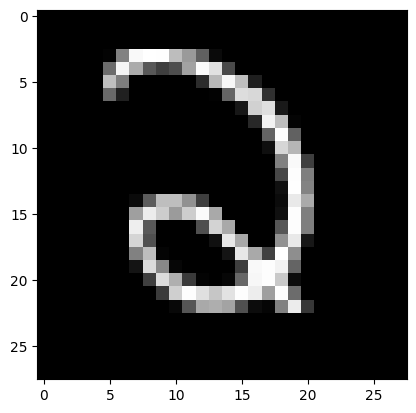

In [60]:
predict(2121, params, cv_X, cv_y)
pyplot.imshow(cv_X[2121], cmap=pyplot.get_cmap('gray'))
print(cv_y[2121])


In [52]:
#tensor flow implementation
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras

In [57]:
y_train_code = to_categorical(train_y, num_classes = 10)
y_train_code[0]

8

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'linear')
])

model.compile(optimizer = 'adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True))

model.fit(train_X, y_train_code, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - loss: 4.0955
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - loss: 1.3214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - loss: 1.0006
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - loss: 0.8347
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - loss: 0.7617
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - loss: 0.6560
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - loss: 0.5717
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - loss: 0.5161
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - loss: 0.4968
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - loss: 0.4725
